<a name = "inicio"></a>
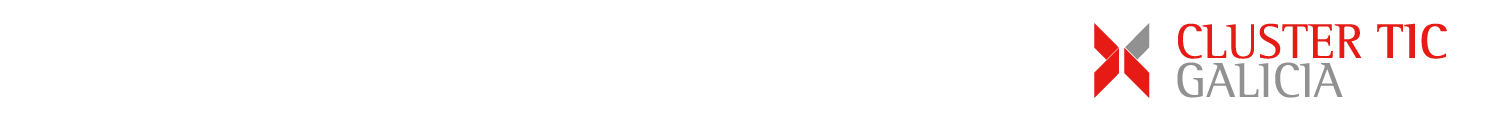

<div style="font-size: 50px;text-align: center;height:70px;padding:10px;margin:10px 0 0 0;">Gráficos de relaciones y tendencias</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
flights = sns.load_dataset("flights")
fmri = sns.load_dataset("fmri")

# Relaciones entre variables cuantitativas

Otra tarea fundamental en el proceso de análisis exploratorio de un conjunto de datos es entender cuál es la relación entre variables. De hecho, ya hemos visto una forma de visualizar esta relación usando la función [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) que muestra, por defecto, un diagrama de dispersión. En esta sección veremos la funcionalidad ofrecida por la función [seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) que permite, no solo crear gráficos de dispersión, sino también gráficos de líneas. Se trata ésta de una función a nivel de figura que, en función del valor que tome el parámetro *kind*, ejecutará, a su vez, la misma funcionalidad que las funciones a nivel de ejes [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) (cuando *kind* tome el valor "*scatter*", valor por defecto) o [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) (cuando *kind* tome el valor "*line*").

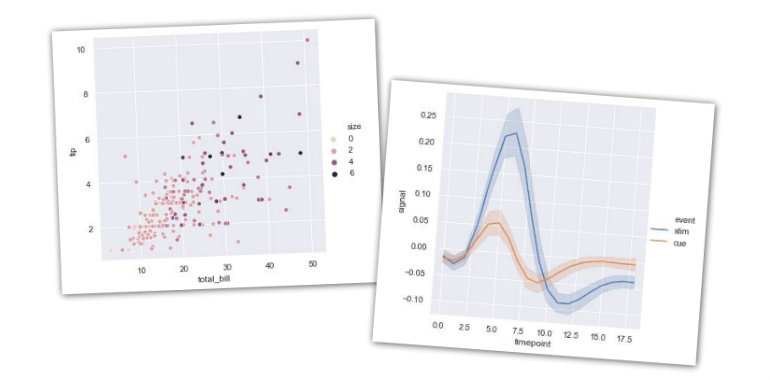

### Diagrama de dispersión

La función [seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) muestra, por defecto, un diagrama de dispersión de las dos variables pasadas como argumentos:

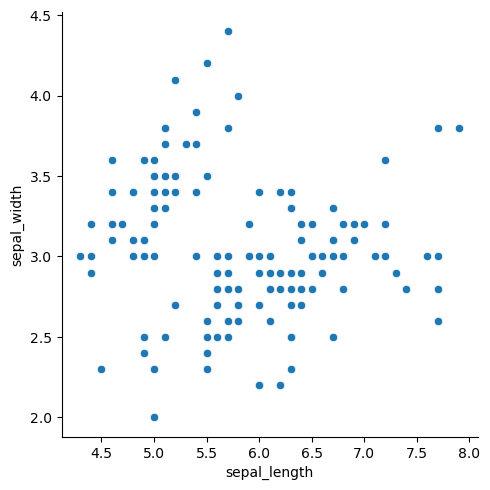

In [4]:
sns.relplot(data = iris, x = "sepal_length", y = "sepal_width")
plt.show()

Estas variables suelen ser cuantitativas pues, en el caso de que alguna de ellas sea cualitativa, Seaborn ofrece gráficas más adecuadas para visualizar la relación entre ellas, como veremos más adelante.

El comportamiento por defecto de la función *sns.relplot* es el correspondiente al argumento *kind = "scatter"*. Es decir, las dos siguientes instrucciones son equivalentes:

sns.relplot(data = iris, x = "sepal_length", y = "sepal_width")

sns.relplot(data = iris, x = "sepal_length", y = "sepal_width", kind = "scatter")

#### hue

Es posible añadir dimensiones adicionales, por ejemplo, utilizando el parámetro **hue** ("tonalidad" en español). Éste controla el color de los puntos:

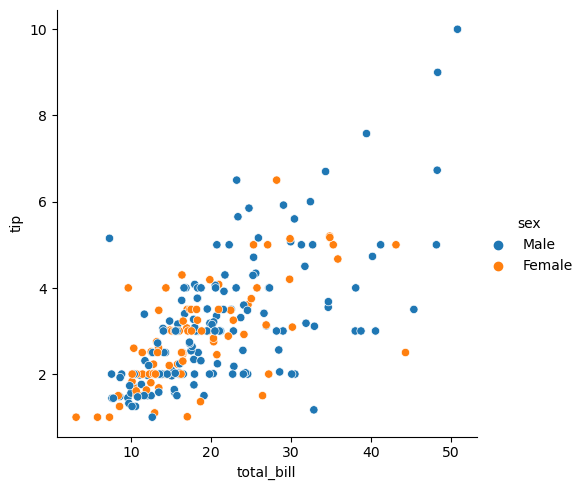

In [5]:
sns.relplot(data = tips, x = "total_bill", y = "tip", hue = "sex")
plt.show()

En el caso anterior se ha utilizado una variable cualitativa para establecer el color de los puntos, lo que resulta muy sencillo de interpretar (si su cardinalidad no es muy elevada: si tuviésemos 28 valores distintos en la variable que usamos para asignar el color probablemente no sería tan fácilmente interpretable). También podemos utilizar una variable cuantitativa, aunque esto eleva ligeramente la complejidad de la gráfica. Por ejemplo, si mostramos por colores el número de comensales (característica "*size*"), el resultado es el siguiente:

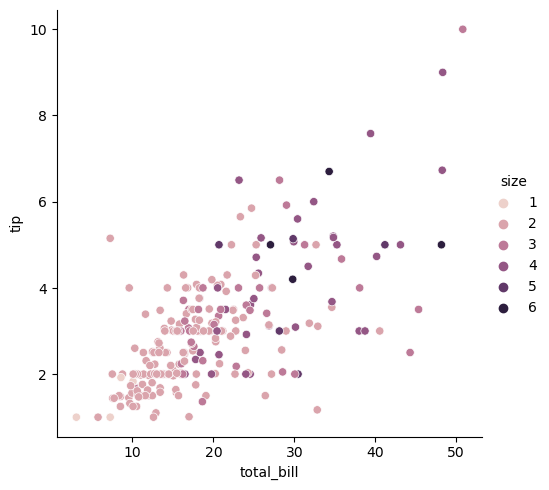

In [6]:
sns.relplot(data = tips, x = "total_bill", y = "tip", hue = "size")
plt.show()

Obsérvese como, en este caso, Seaborn ha cambiado la paleta de colores a una secuencial.

#### style

El parámetro **style** permite añadir una dimensión adicional al aplicar un marcador diferente a cada uno de los puntos en función de los valores de la variable que se indique. Por ejemplo, podemos diferenciar los almuerzos de las cenas modificando el marcador de cada comida:

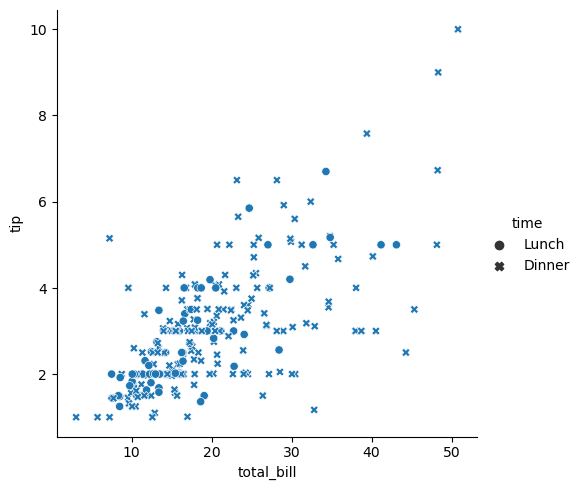

In [7]:
sns.relplot(data = tips, x = "total_bill", y = "tip", style = "time")
plt.show()

Si se está añadiendo este criterio de segmentación a una gráfica en la que ya estuviésemos haciendo uso del color para segmentar los datos (parámetro **hue** ya comentado), el resultado puede resultar difícil de interpretar. Por ejemplo, en la siguiente gráfica se modifica tanto el color de la marca gráfica en función del sexo del comensal como el tipo de símbolo en función del tipo de la comida:

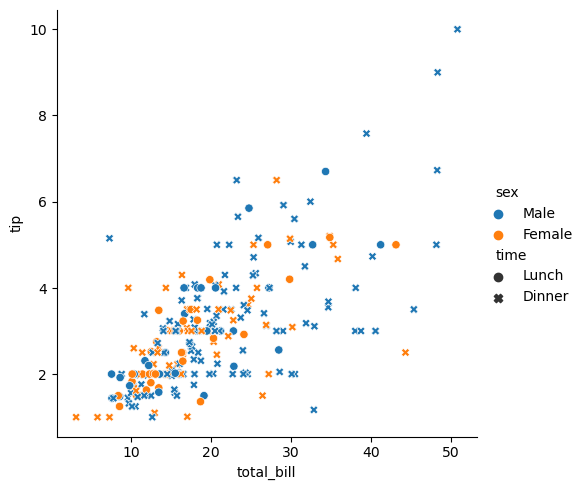

In [8]:
sns.relplot(data = tips, x = "total_bill", y = "tip", hue = "sex", style = "time")
plt.show()

El resultado, efectivamente, no transmite el mensaje con la facilidad que desearíamos (y en este caso solo tenemos dos valores en la variable *sex* y otros dos en la variable *time*. Si su cardinalidad fuese mayor, el resultado sería todavía más confuso).

Lo que sí podemos hacer es utilizar este herramienta para cambiar, en función de un mismo criterio, tanto el color como el símbolo de los puntos, con el objetivo de reforzar el mensaje:

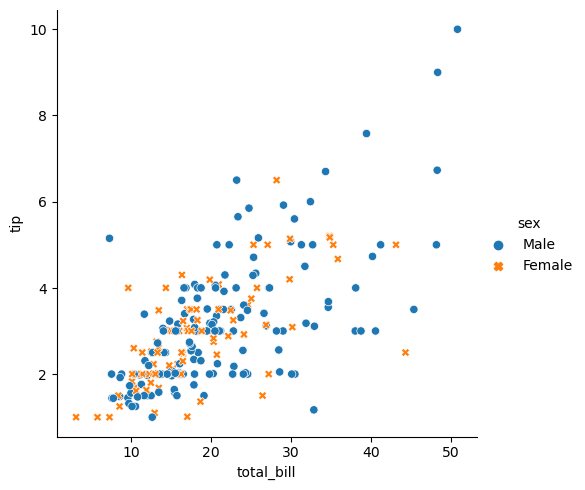

In [9]:
sns.relplot(data = tips, x = "total_bill", y = "tip", hue = "sex", style = "sex")
plt.show()

#### size

La tercera alternativa para añadir una nueva dimensión a los datos es mediante el tamaño de los puntos, lo que podemos conseguir con el parámetro **size**:

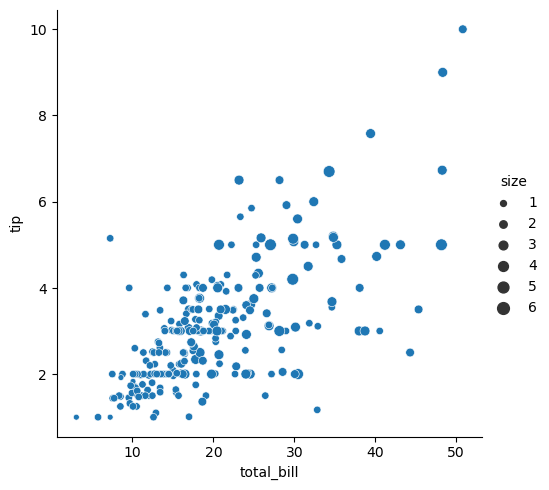

In [10]:
sns.relplot(data = tips, x = "total_bill", y = "tip", size = "size")
plt.show()

En la imagen anterior estamos modificando el tamaño del punto en función del número de comensales (campo *size* del conjunto de datos).

Como se ha comentado, la función *seaborn.relplot()* ofrece una funcionalidad semejante a la ofrecida por la función [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), siendo ésta última una función a nivel de ejes. De esta forma, la anterior gráfica puede ser también creada con la siguiente instrucción:

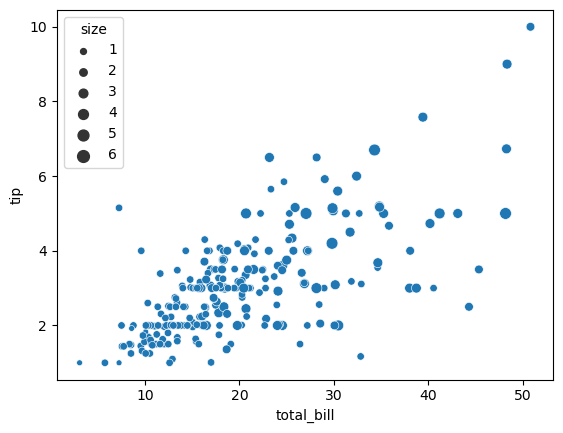

In [11]:
sns.scatterplot(data = tips, x = "total_bill", y = "tip", size = "size")
plt.show()

El único cambio apreciable es el tamaño de la gráfica y la posición de la leyenda, pero no olvidemos que las funciones a nivel de figura crean y controlan la figura y el conjunto de ejes según sus propios criterios.

##### Deshabilitando la leyenda

En ocasiones puede ser conveniente ocultar la leyenda de la gráfica. Para ello, basta con añadir el argumento *legend = False*. De esta forma, si repetimos el gráfico anterior con esta modificación:

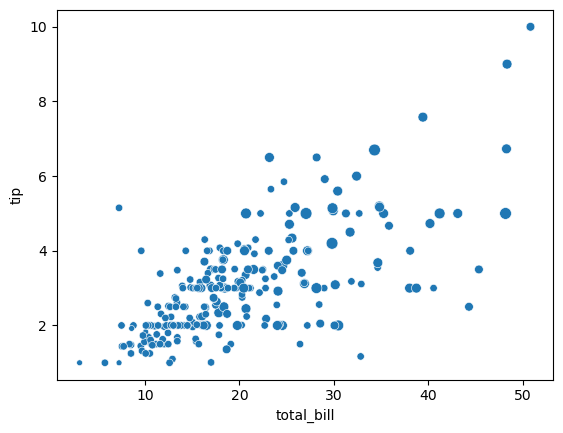

In [12]:
sns.scatterplot(data = tips, x = "total_bill", y = "tip", size = "size", legend = False)
plt.show()

vemos que no se ha mostrado.

### Gráfico de líneas

Un caso especial de la gráfica de dispersión es la que muestra la relación entre dos variables cuando existe una dependencia entre ellas. Por ejemplo, cuando tenemos datos de una variable a lo largo del tiempo, del espacio o de otra variable cuantitativa continua. Este tipo de gráficas pueden conseguirse con la función a nivel de figura [seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) con el argumento *kind = "line"*:

In [13]:
data = pd.DataFrame({
    "x": range(100),
    "y": np.random.randn(100).cumsum()
})

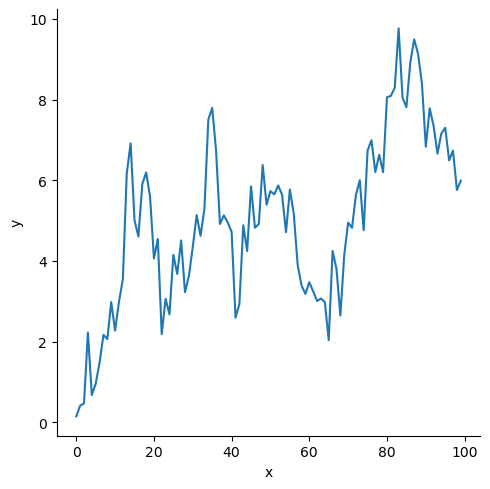

In [14]:
sns.relplot(data = data, x = "x", y = "y", kind = "line")
plt.show()

Una gráfica semejante puede conseguirse con la función a nivel de ejes [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html):

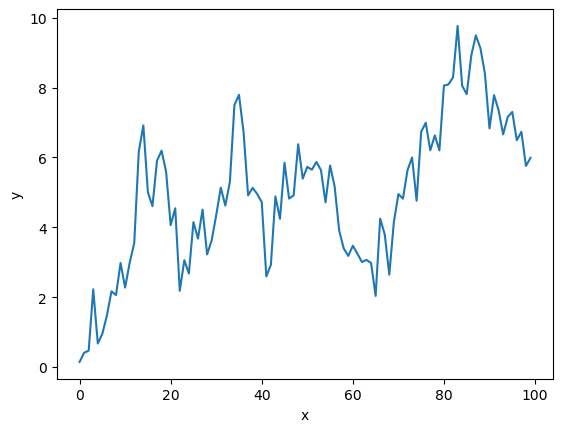

In [15]:
sns.lineplot(data = data, x = "x", y = "y")
plt.show()

Por supuesto, aun cuando estemos mostrando el gráfico de líneas, seguimos teniendo a nuestra disposición las herramientas vistas para esta función, controlables mediante los parámetros **hue**, **size** y **style**. Esto lo veremos en breve.

Echemos un vistazo antes a las gráficas de líneas con agregación de datos.

#### Gráfico de líneas con agregación

Un caso especial de gráficos de líneas lo encontramos cuando para cada valor de $x$ puede existir más de un valor $y$. En estos casos, el comportamiento por defecto de Seaborn es mostrar el valor medio de los valores y el intervalo de confianza del 95%. Un ejemplo de este tipo lo encontramos en el dataset de ejemplo *flights*, con información del número de pasajeros transportados por mes y por año:

Mostremos la gráfica de líneas:

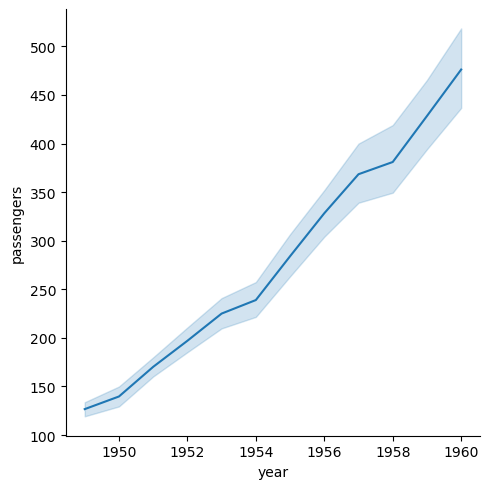

In [16]:
sns.relplot(data = flights, x = "year", y = "passengers", kind = "line")
plt.show()

La línea principal mostrada de color azul oscuro es el valor medio de los pasajeros transportados el año correspondiente, y el área azul claro por encima y por debajo representa el intervalo de confianza del 95%. Este intervalo es calculado usando [bootstrapping](https://es.wikipedia.org/wiki/Bootstrapping_(estad%C3%ADstica)).

El parámetro **errorbar** controla el comportamiento de esta opción. Puede tomar como valores, entre otros, un texto ("*ci*", "*pi*", "*se*" o "*sd*") o una tupla con uno de los textos indicados y un parámetro numérico adicional. Por ejemplo, si pasamos como valor la tupla ("ci", 95), estamos configurando la gráfica de modo que muestre el intervalo de confianza (*confidence interval*) del 95% (valor por defecto).

En el siguiente ejemplo se muestra la misma gráfica con un intervalo de confianza del 40%:

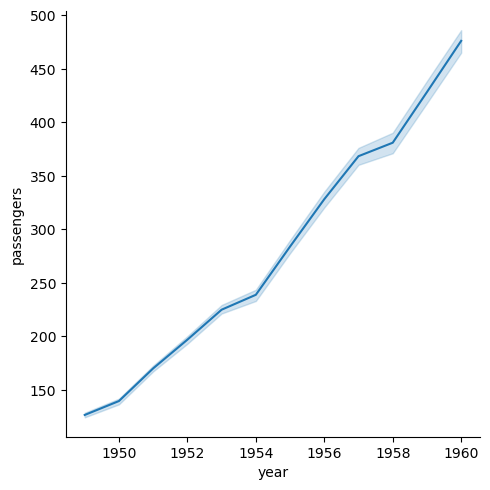

In [17]:
sns.relplot(data = flights, x = "year", y = "passengers", kind = "line", errorbar = ("ci", 40))
plt.show()

Si toma el valor "*sd*" se mostrará la desviación estándar de los datos:

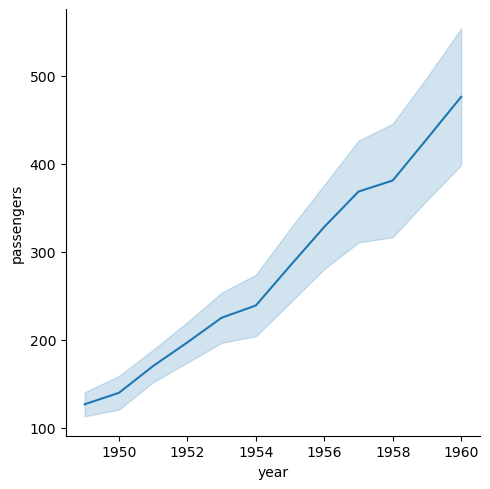

In [18]:
sns.relplot(data = flights, x = "year", y = "passengers", kind = "line", errorbar = "sd")
plt.show()

Pasando al parámetro *errorbar* el valor *None* se desactiva el cálculo del intervalo de confianza:

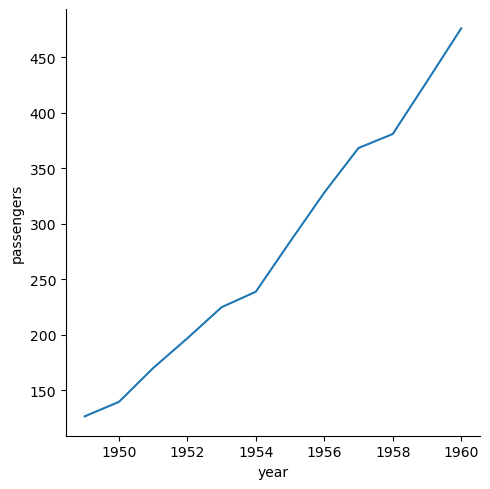

In [19]:
sns.relplot(data = flights, x = "year", y = "passengers", kind = "line", errorbar = None)
plt.show()

De hecho, todos los ejemplos anteriores han mostrado un intervalo de confianza en torno al *valor medio* de los datos, pero es posible agregarlos según otros métodos utilizando el parámetro **estimator**. Por ejemplo, según la mediana:

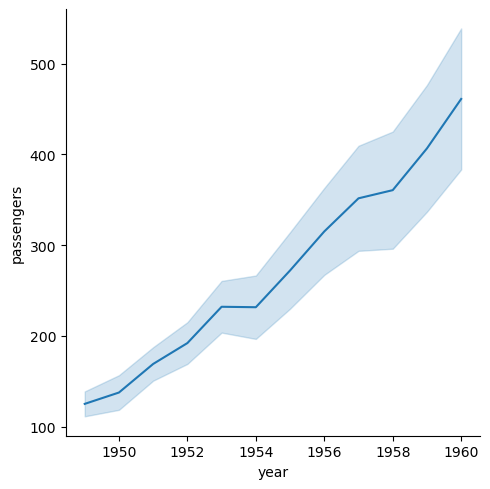

In [20]:
sns.relplot(
    data = flights,
    x = "year",
    y = "passengers",
    kind = "line",
    estimator = "median",
    errorbar = "sd"
)
plt.show()

según el valor máximo:

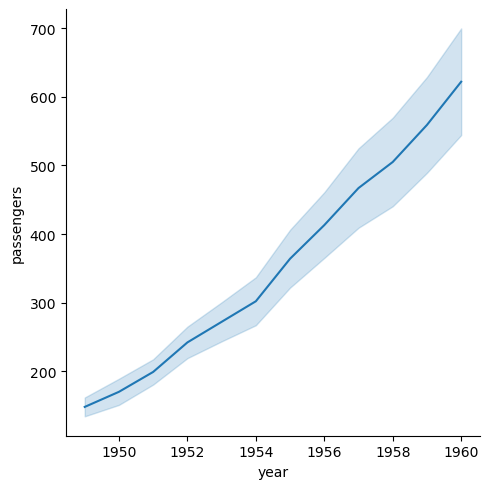

In [21]:
sns.relplot(
    data = flights,
    x = "year",
    y = "passengers",
    kind = "line",
    estimator = "max",
    errorbar = "sd"
)
plt.show()

etc. En las gráficas anteriores, además de mostrar el resultado de aplicar la función de agregación indicada, se ha dejado el "*margen de error*" visible.

Usando la función a nivel de ejes equivalente, [sns.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html), podemos mostrar la gráfica anterior con tres estimadores (correspondientes al valor medio, máximo y mínimo) en el mismo conjunto de ejes, y ver cómo se representa cada uno:

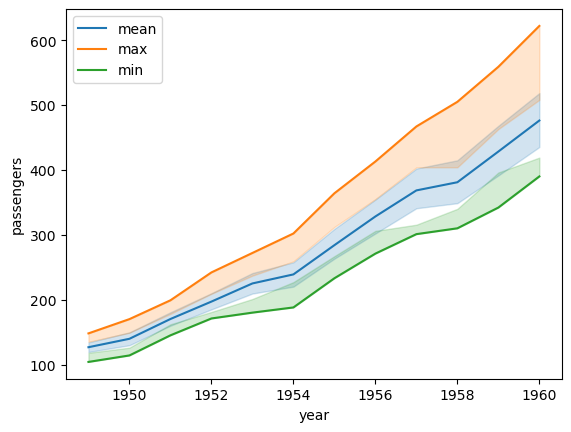

In [22]:
sns.lineplot(data = flights, x = "year", y = "passengers", estimator = "mean", label = "mean")
sns.lineplot(data = flights, x = "year", y = "passengers", estimator = "max", label = "max")
sns.lineplot(data = flights, x = "year", y = "passengers", estimator = "min", label = "min")
plt.show()

#### Variables visuales en gráficos de líneas

Ya comentamos que la función [seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) (y su correspondiente función a nivel de ejes cuando se muestran gráficos de líneas, [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)) tienen las mismas opciones de agregación de nuevas dimensiones de información que la función [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). Veámoslas una a una, y para ello partamos del dataset *fmri*:

Este dataset muestra información de señales captadas en diferentes regiones del cráneo, de diferentes sujetos, en diferentes momentos, y durante diferentes eventos (información no está documentada). Es decir, para un momento determinado (campo *timepoint*) tendremos varias señales. Mostremos ambos campos en una gráfica de líneas básica:

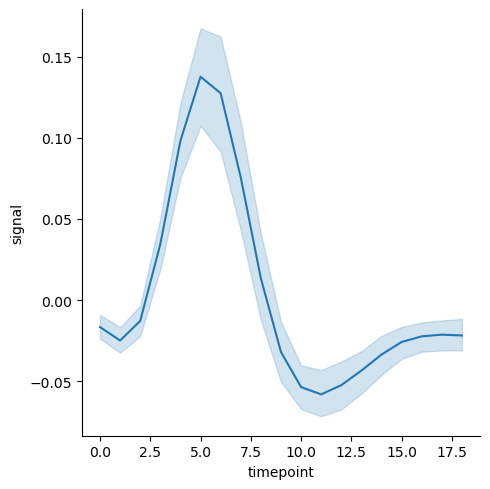

In [23]:
sns.relplot(data = fmri, x = "timepoint", y = "signal", kind = "line")
plt.show()

Pues bien, podemos dividir la línea mostrada en dos según el evento que genera la señal, mostrando cada una de un color distinto, usando el parámetro **hue**:

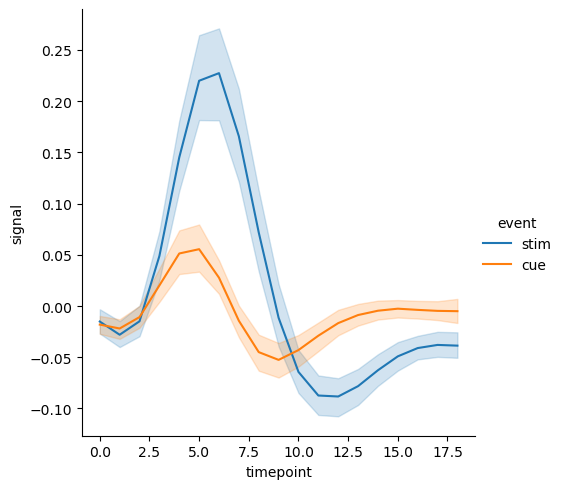

In [24]:
sns.relplot(data = fmri, x = "timepoint", y = "signal", kind = "line", hue = "event")
plt.show()

El parámetro **style** también provoca la disgregación de la curva inicial en varias, en este caso diferenciadas por el estilo de línea:

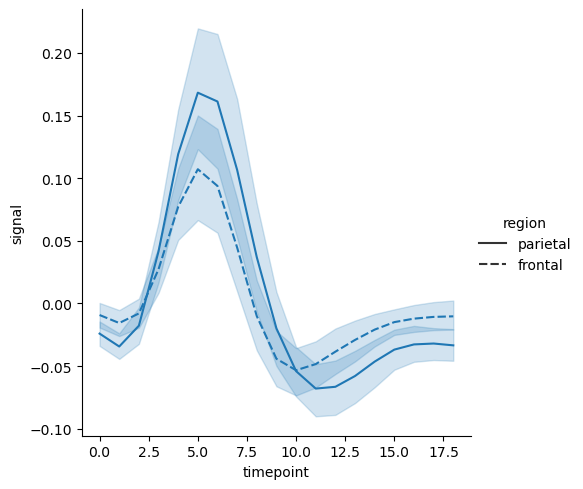

In [25]:
sns.relplot(data = fmri, x = "timepoint", y = "signal", kind = "line", style = "region")
plt.show()

Por último, también es posible modificar el tamaño de las líneas, aunque si no existe una relación directa entre éste y las cifras representadas por cada línea, difícilmente será correctamente interpretada esta variable visual:

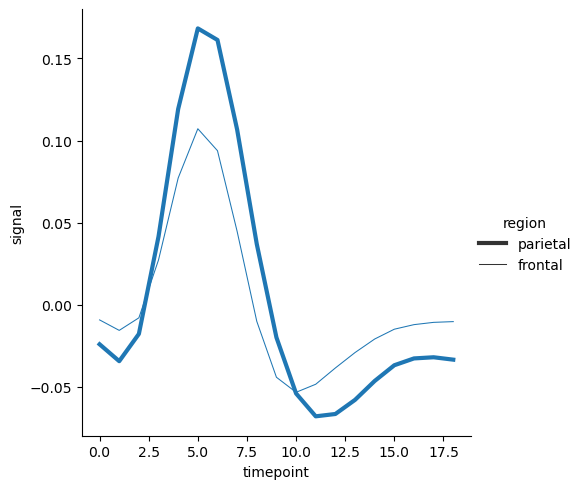

In [26]:
sns.relplot(
    data = fmri,
    x = "timepoint",
    y = "signal",
    kind = "line",
    size = "region",
    errorbar = None
)
plt.show()

(se ha eliminado el intervalo de confianza para poder visualizar mejor las líneas).

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>